In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.python.keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import tensorflow as tf

In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)

    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [3]:
Images, Labels = get_images('../archive/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [4]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


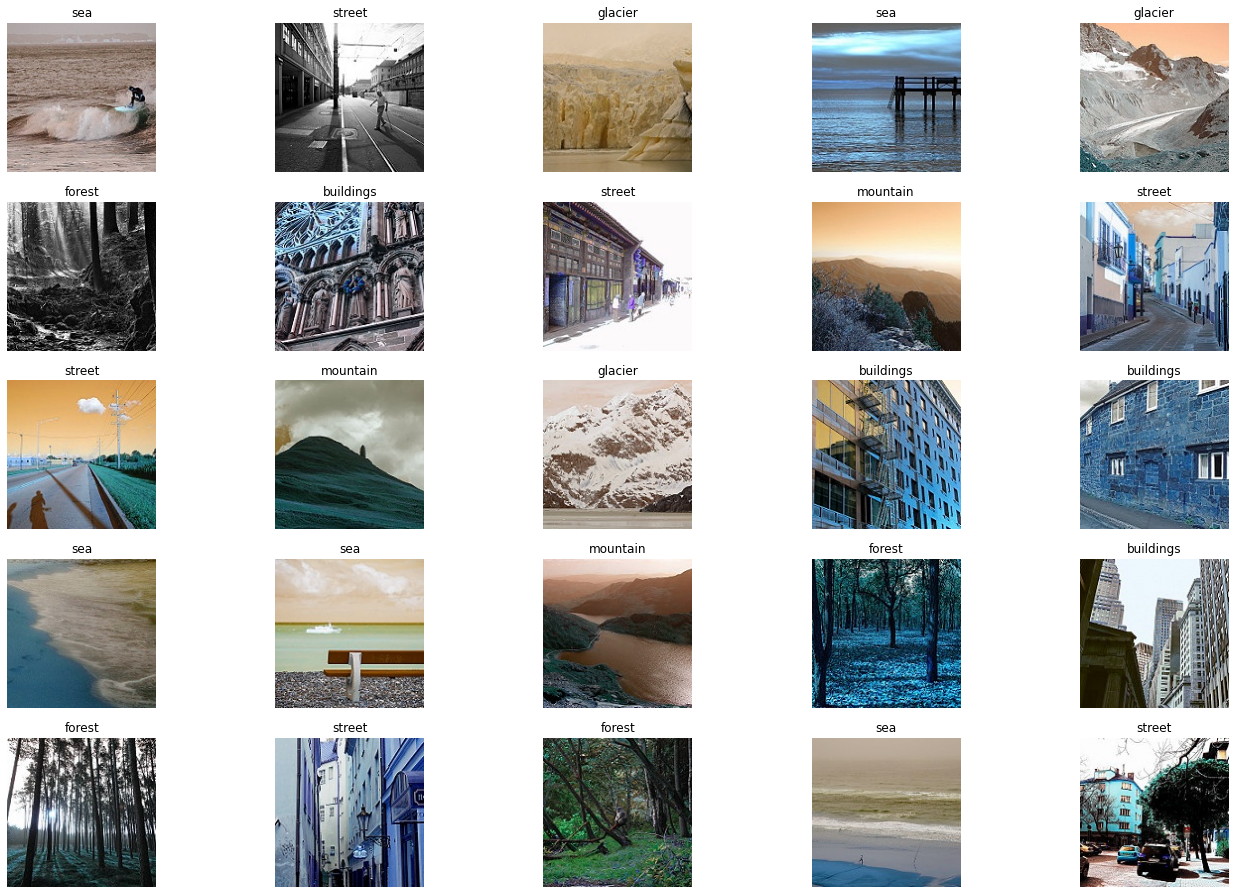

In [5]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))
#Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [8]:
#trained = model.fit(Images,Labels,epochs=10,validation_split=0.30)
trained = model.fit(Images, Labels, batch_size=30, epochs=20, validation_split = 0.3)

Train on 9823 samples, validate on 4211 samples
Epoch 1/20
9823/9823 [==============================] - 70s 7ms/sample - loss: 1.5591 - accuracy: 0.4176 - val_loss: 1.0084 - val_accuracy: 0.6056
Epoch 2/20
1440/9823 [===>..........................] - ETA: 52s - loss: 1.1747 - accuracy: 0.5305

KeyboardInterrupt: 

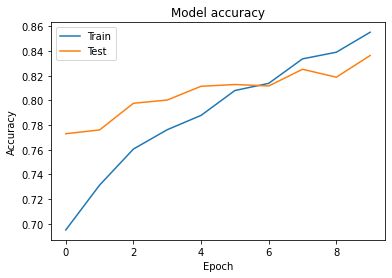

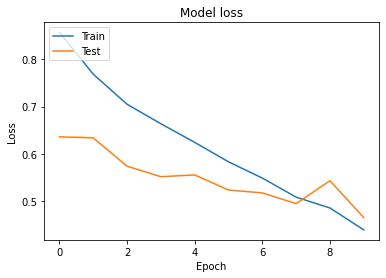

In [12]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [4]:
model2 = Models.Sequential()

model2.add(Layers.Conv2D(64, (3, 3), activation= 'softmax', input_shape = (150, 150, 3)))
model2.add(Layers.MaxPooling2D(2,2))
model2.add(Layers.Conv2D(32, (3,3), activation= 'softmax'))
model2.add(Layers.MaxPooling2D(2,2))
model2.add(Layers.Flatten())
model2.add(Layers.Dense(32, activation=tf.nn.softmax))

In [5]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model2.fit(Images, Labels, batch_size=64, epochs=15, validation_split = 0.2)

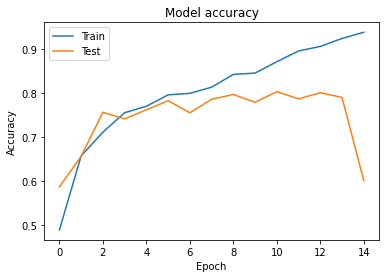

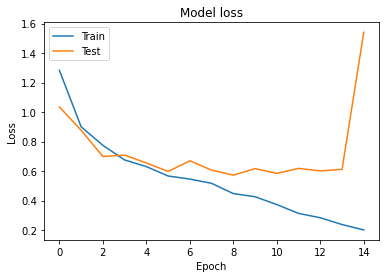

In [7]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [8]:
model3 = Models.Sequential()

model3.add(Layers.Conv2D(180, (3, 3), activation= 'relu', input_shape = (150, 150, 3)))
model3.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model3.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model3.add(Layers.MaxPool2D(5,5))
model3.add(Layers.Dense(64,activation='relu'))
model3.add(Layers.Conv2D(32, (3,3), activation= 'relu'))
model3.add(Layers.MaxPooling2D(2,2))
model3.add(Layers.Flatten())
model3.add(Layers.Dense(64, activation=tf.nn.relu))
model3.add(Layers.Dense(32, activation=tf.nn.relu))
model3.add(Layers.Dense(16, activation=tf.nn.softmax))

model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(Images, Labels, batch_size=64, epochs=15, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/15
11227/11227 [==============================] - 105s 9ms/sample - loss: 1.4432 - accuracy: 0.5153 - val_loss: 0.9163 - val_accuracy: 0.6281
Epoch 2/15
11227/11227 [==============================] - 95s 9ms/sample - loss: 0.9100 - accuracy: 0.6402 - val_loss: 0.8436 - val_accuracy: 0.6719
Epoch 3/15
11227/11227 [==============================] - 96s 9ms/sample - loss: 0.7827 - accuracy: 0.7071 - val_loss: 0.7898 - val_accuracy: 0.7079
Epoch 4/15
11227/11227 [==============================] - 86s 8ms/sample - loss: 0.6821 - accuracy: 0.7461 - val_loss: 0.7506 - val_accuracy: 0.7193
Epoch 5/15
11227/11227 [==============================] - 80s 7ms/sample - loss: 0.5720 - accuracy: 0.7872 - val_loss: 0.7678 - val_accuracy: 0.7275
Epoch 6/15
11227/11227 [==============================] - 80s 7ms/sample - loss: 0.4605 - accuracy: 0.8288 - val_loss: 0.6783 - val_accuracy: 0.7788
Epoch 7/15
11227/11227 [==============================] 

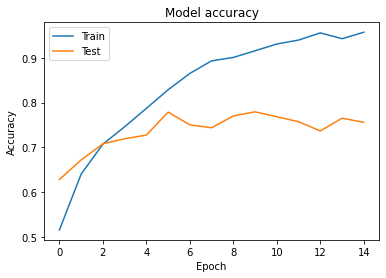

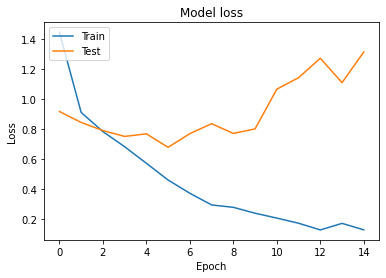

In [9]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [46]:
model4 = Models.Sequential()

model4.add(Layers.Conv2D(64, (3, 3), activation= 'hard_sigmoid', input_shape = (150, 150, 3)))
model4.add(Layers.MaxPooling2D(2,2))
model4.add(Layers.Conv2D(32, (3,3), activation= 'hard_sigmoid'))
model4.add(Layers.MaxPooling2D(2,2))
model4.add(Layers.Flatten())
model4.add(Layers.Dense(32, activation=tf.nn.relu))
model4.add(Layers.Dense(16, activation=tf.nn.softmax))

model4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model4.fit(Images, Labels, batch_size=64, epochs=15, validation_split = 0.2)

ValueError: Unknown activation function:swish

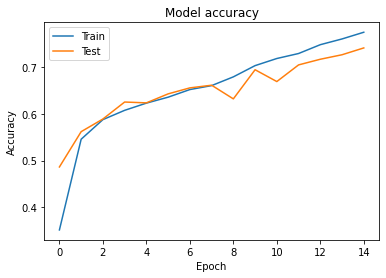

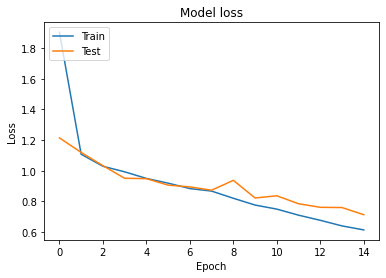

In [25]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [26]:
model5 = Models.Sequential()

model5.add(Layers.Conv2D(64, (3, 3), activation= 'softplus', input_shape = (150, 150, 3)))
model5.add(Layers.MaxPooling2D(2,2))
model5.add(Layers.Conv2D(32, (3,3), activation= 'softplus'))
model5.add(Layers.MaxPooling2D(2,2))
model5.add(Layers.Flatten())
model5.add(Layers.Dense(32, activation=tf.nn.relu))
model5.add(Layers.Dense(16, activation=tf.nn.softmax))

model5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model5.fit(Images, Labels, batch_size=64, epochs=15, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/15
11227/11227 [==============================] - 7s 631us/sample - loss: 13.3711 - accuracy: 0.2539 - val_loss: 1.5204 - val_accuracy: 0.4254
Epoch 2/15
11227/11227 [==============================] - 7s 584us/sample - loss: 1.4402 - accuracy: 0.4848 - val_loss: 1.9115 - val_accuracy: 0.4364
Epoch 3/15
11227/11227 [==============================] - 8s 669us/sample - loss: 1.1351 - accuracy: 0.5848 - val_loss: 1.3957 - val_accuracy: 0.4788
Epoch 4/15
11227/11227 [==============================] - 7s 667us/sample - loss: 0.9446 - accuracy: 0.6633 - val_loss: 1.4618 - val_accuracy: 0.5208
Epoch 5/15
11227/11227 [==============================] - 8s 671us/sample - loss: 0.8034 - accuracy: 0.7107 - val_loss: 1.5242 - val_accuracy: 0.4813
Epoch 6/15
11227/11227 [==============================] - 7s 667us/sample - loss: 0.6175 - accuracy: 0.7804 - val_loss: 1.6820 - val_accuracy: 0.4845
Epoch 7/15
11227/11227 [==========================

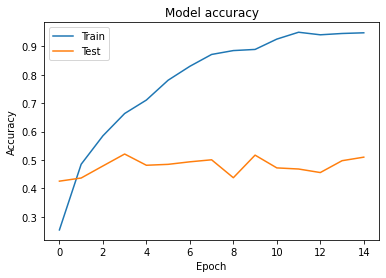

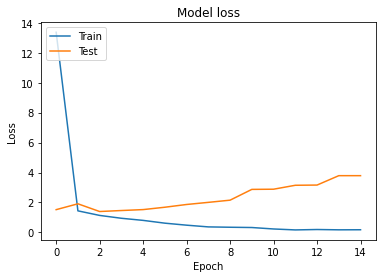

In [27]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [39]:
model6 = Models.Sequential()

model6.add(Layers.Conv2D(64, (3, 3), activation= 'softsign', input_shape = (150, 150, 3)))
model6.add(Layers.MaxPooling2D(2,2))
model6.add(Layers.Conv2D(32, (3,3), activation= 'softsign'))
model6.add(Layers.MaxPooling2D(2,2))
model6.add(Layers.Flatten())
model6.add(Layers.Dense(32, activation=tf.nn.relu))
model6.add(Layers.Dense(16, activation=tf.nn.softmax))

model6.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model6.fit(Images, Labels, batch_size=64, epochs=15, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/15
11227/11227 [==============================] - 8s 705us/sample - loss: 2.1938 - accuracy: 0.3362 - val_loss: 1.5808 - val_accuracy: 0.4232
Epoch 2/15
11227/11227 [==============================] - 8s 710us/sample - loss: 1.4085 - accuracy: 0.4372 - val_loss: 1.3577 - val_accuracy: 0.4336
Epoch 3/15
11227/11227 [==============================] - 8s 734us/sample - loss: 1.1910 - accuracy: 0.4628 - val_loss: 1.1603 - val_accuracy: 0.4688
Epoch 4/15
11227/11227 [==============================] - 8s 707us/sample - loss: 1.1515 - accuracy: 0.4808 - val_loss: 1.1235 - val_accuracy: 0.5030
Epoch 5/15
11227/11227 [==============================] - 8s 709us/sample - loss: 1.0843 - accuracy: 0.5272 - val_loss: 1.2935 - val_accuracy: 0.4549
Epoch 6/15
11227/11227 [==============================] - 8s 698us/sample - loss: 1.0043 - accuracy: 0.5821 - val_loss: 1.0554 - val_accuracy: 0.5632
Epoch 7/15
11227/11227 [===========================

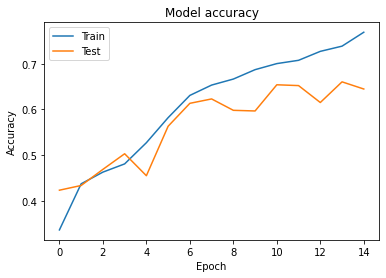

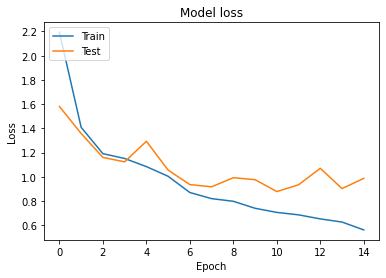

In [40]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [31]:
model7 = Models.Sequential()

model7.add(Layers.Conv2D(64, (3, 3), activation= 'tanh', input_shape = (150, 150, 3)))
model7.add(Layers.MaxPooling2D(2,2))
model7.add(Layers.Conv2D(32, (3,3), activation= 'tanh'))
model7.add(Layers.MaxPooling2D(2,2))
model7.add(Layers.Flatten())
model7.add(Layers.Dense(32, activation=tf.nn.relu))
model7.add(Layers.Dense(16, activation=tf.nn.softmax))

model7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model7.fit(Images, Labels, batch_size=64, epochs=15, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/15
11227/11227 [==============================] - 7s 650us/sample - loss: 2.1290 - accuracy: 0.3596 - val_loss: 1.7086 - val_accuracy: 0.4304
Epoch 2/15
11227/11227 [==============================] - 7s 610us/sample - loss: 1.4565 - accuracy: 0.3996 - val_loss: 1.2777 - val_accuracy: 0.4421
Epoch 3/15
11227/11227 [==============================] - 7s 613us/sample - loss: 1.2535 - accuracy: 0.4702 - val_loss: 1.2274 - val_accuracy: 0.5237
Epoch 4/15
11227/11227 [==============================] - 7s 583us/sample - loss: 1.1029 - accuracy: 0.5473 - val_loss: 1.0917 - val_accuracy: 0.5807
Epoch 5/15
11227/11227 [==============================] - 6s 524us/sample - loss: 1.0089 - accuracy: 0.5909 - val_loss: 1.0664 - val_accuracy: 0.5789
Epoch 6/15
11227/11227 [==============================] - 6s 532us/sample - loss: 0.9125 - accuracy: 0.6407 - val_loss: 1.1005 - val_accuracy: 0.5871
Epoch 7/15
11227/11227 [===========================

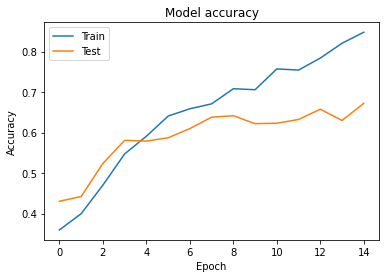

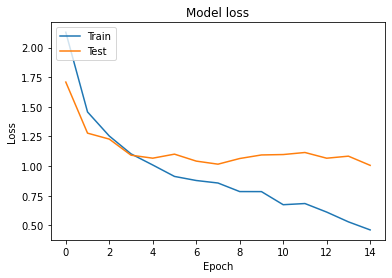

In [32]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [42]:
model8 = Models.Sequential()

model8.add(Layers.Conv2D(64, (3, 3), activation= 'sigmoid', input_shape = (150, 150, 3)))
model8.add(Layers.MaxPooling2D(2,2))
model8.add(Layers.Conv2D(32, (3,3), activation= 'sigmoid'))
model8.add(Layers.MaxPooling2D(2,2))
model8.add(Layers.Flatten())
model8.add(Layers.Dense(32, activation=tf.nn.relu))
model8.add(Layers.Dense(6, activation=tf.nn.softmax))

model8.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model8.fit(Images, Labels, batch_size=64, epochs=15, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/15
11227/11227 [==============================] - 8s 699us/sample - loss: 2.2072 - accuracy: 0.2386 - val_loss: 1.3522 - val_accuracy: 0.4524
Epoch 2/15
11227/11227 [==============================] - 8s 677us/sample - loss: 1.2142 - accuracy: 0.4985 - val_loss: 1.0911 - val_accuracy: 0.5226
Epoch 3/15
11227/11227 [==============================] - 8s 683us/sample - loss: 1.0754 - accuracy: 0.5496 - val_loss: 1.0281 - val_accuracy: 0.5739
Epoch 4/15
11227/11227 [==============================] - 8s 682us/sample - loss: 1.0380 - accuracy: 0.5634 - val_loss: 1.0024 - val_accuracy: 0.5900
Epoch 5/15
11227/11227 [==============================] - 8s 669us/sample - loss: 0.9607 - accuracy: 0.6079 - val_loss: 0.8977 - val_accuracy: 0.6445
Epoch 6/15
11227/11227 [==============================] - 7s 597us/sample - loss: 0.8897 - accuracy: 0.6336 - val_loss: 0.8461 - val_accuracy: 0.6651
Epoch 7/15
11227/11227 [===========================

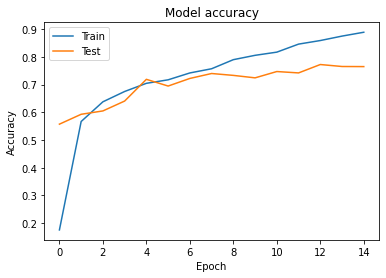

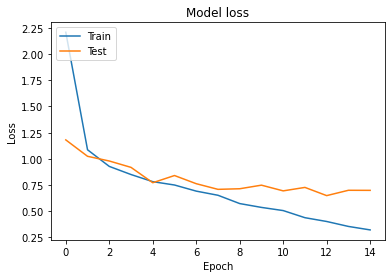

In [34]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [35]:
model9 = Models.Sequential()

model9.add(Layers.Conv2D(64, (3, 3), activation= 'linear', input_shape = (150, 150, 3)))
model9.add(Layers.MaxPooling2D(2,2))
model9.add(Layers.Conv2D(32, (3,3), activation= 'linear'))
model9.add(Layers.MaxPooling2D(2,2))
model9.add(Layers.Flatten())
model9.add(Layers.Dense(32, activation=tf.nn.relu))
model9.add(Layers.Dense(16, activation=tf.nn.softmax))

model9.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model9.fit(Images, Labels, batch_size=64, epochs=15, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/15
11227/11227 [==============================] - 6s 521us/sample - loss: 54.4179 - accuracy: 0.1571 - val_loss: 2.6184 - val_accuracy: 0.1710
Epoch 2/15
11227/11227 [==============================] - 6s 490us/sample - loss: 2.5411 - accuracy: 0.1595 - val_loss: 2.4667 - val_accuracy: 0.1710
Epoch 3/15
11227/11227 [==============================] - 6s 496us/sample - loss: 2.4035 - accuracy: 0.1595 - val_loss: 2.3429 - val_accuracy: 0.1710
Epoch 4/15
11227/11227 [==============================] - 6s 498us/sample - loss: 2.2923 - accuracy: 0.1595 - val_loss: 2.2440 - val_accuracy: 0.1710
Epoch 5/15
11227/11227 [==============================] - 6s 498us/sample - loss: 2.2038 - accuracy: 0.1595 - val_loss: 2.1656 - val_accuracy: 0.1710
Epoch 6/15
11227/11227 [==============================] - 6s 498us/sample - loss: 2.1337 - accuracy: 0.1638 - val_loss: 2.1038 - val_accuracy: 0.1653
Epoch 7/15
11227/11227 [==========================

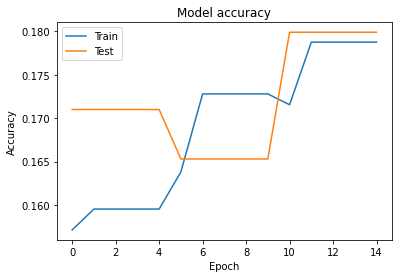

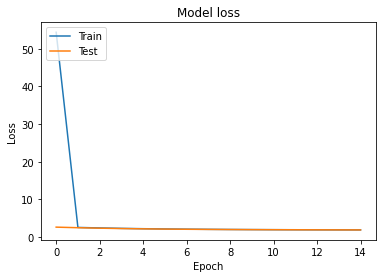

In [36]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [4]:
model10 = Models.Sequential()

model10.add(Layers.Conv2D(64, (3, 3), activation= 'exponential', input_shape = (150, 150, 3)))
model10.add(Layers.MaxPooling2D(2,2))
model10.add(Layers.Conv2D(32, (3,3), activation= 'exponential'))
model10.add(Layers.MaxPooling2D(2,2))
model10.add(Layers.Flatten())
model10.add(Layers.Dense(32, activation=tf.nn.relu))
model10.add(Layers.Dense(16, activation=tf.nn.softmax))

model10.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history = model10.fit(Images, Labels, batch_size=64, epochs=15, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/15
11227/11227 [==============================] - 10s 857us/sample - loss: 2.6737 - accuracy: 0.1692 - val_loss: 2.5801 - val_accuracy: 0.1653
Epoch 2/15
11227/11227 [==============================] - 7s 588us/sample - loss: 2.5010 - accuracy: 0.1728 - val_loss: 2.4267 - val_accuracy: 0.1653
Epoch 3/15
11227/11227 [==============================] - 7s 589us/sample - loss: 2.3641 - accuracy: 0.1768 - val_loss: 2.3058 - val_accuracy: 0.1799
Epoch 4/15
11227/11227 [==============================] - 7s 604us/sample - loss: 2.2569 - accuracy: 0.1707 - val_loss: 2.2115 - val_accuracy: 0.1799
Epoch 5/15
11227/11227 [==============================] - 7s 611us/sample - loss: 2.1731 - accuracy: 0.1788 - val_loss: 2.1379 - val_accuracy: 0.1799
Epoch 6/15
11227/11227 [==============================] - 7s 592us/sample - loss: 2.1075 - accuracy: 0.1788 - val_loss: 2.0803 - val_accuracy: 0.1799
Epoch 7/15
11227/11227 [==========================

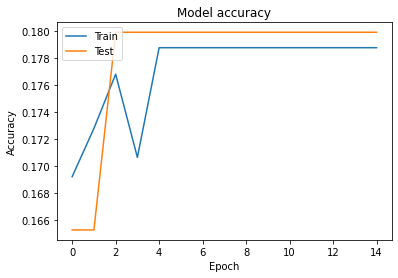

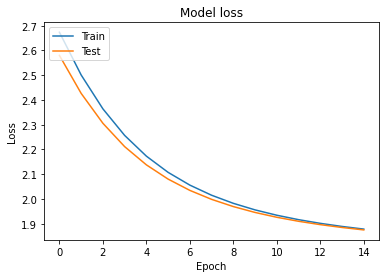

In [5]:
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [11]:
test_images, test_labels = get_images('../archive/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [12]:
model8.evaluate(test_images, test_labels, verbose=1)

3000/3000 [==============================] - 1s 271us/sample - loss: 0.7330 - accuracy: 0.7373


[0.7330287880897522, 0.73733336]

In [14]:
pred_images,no_labels = get_images('../archive/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

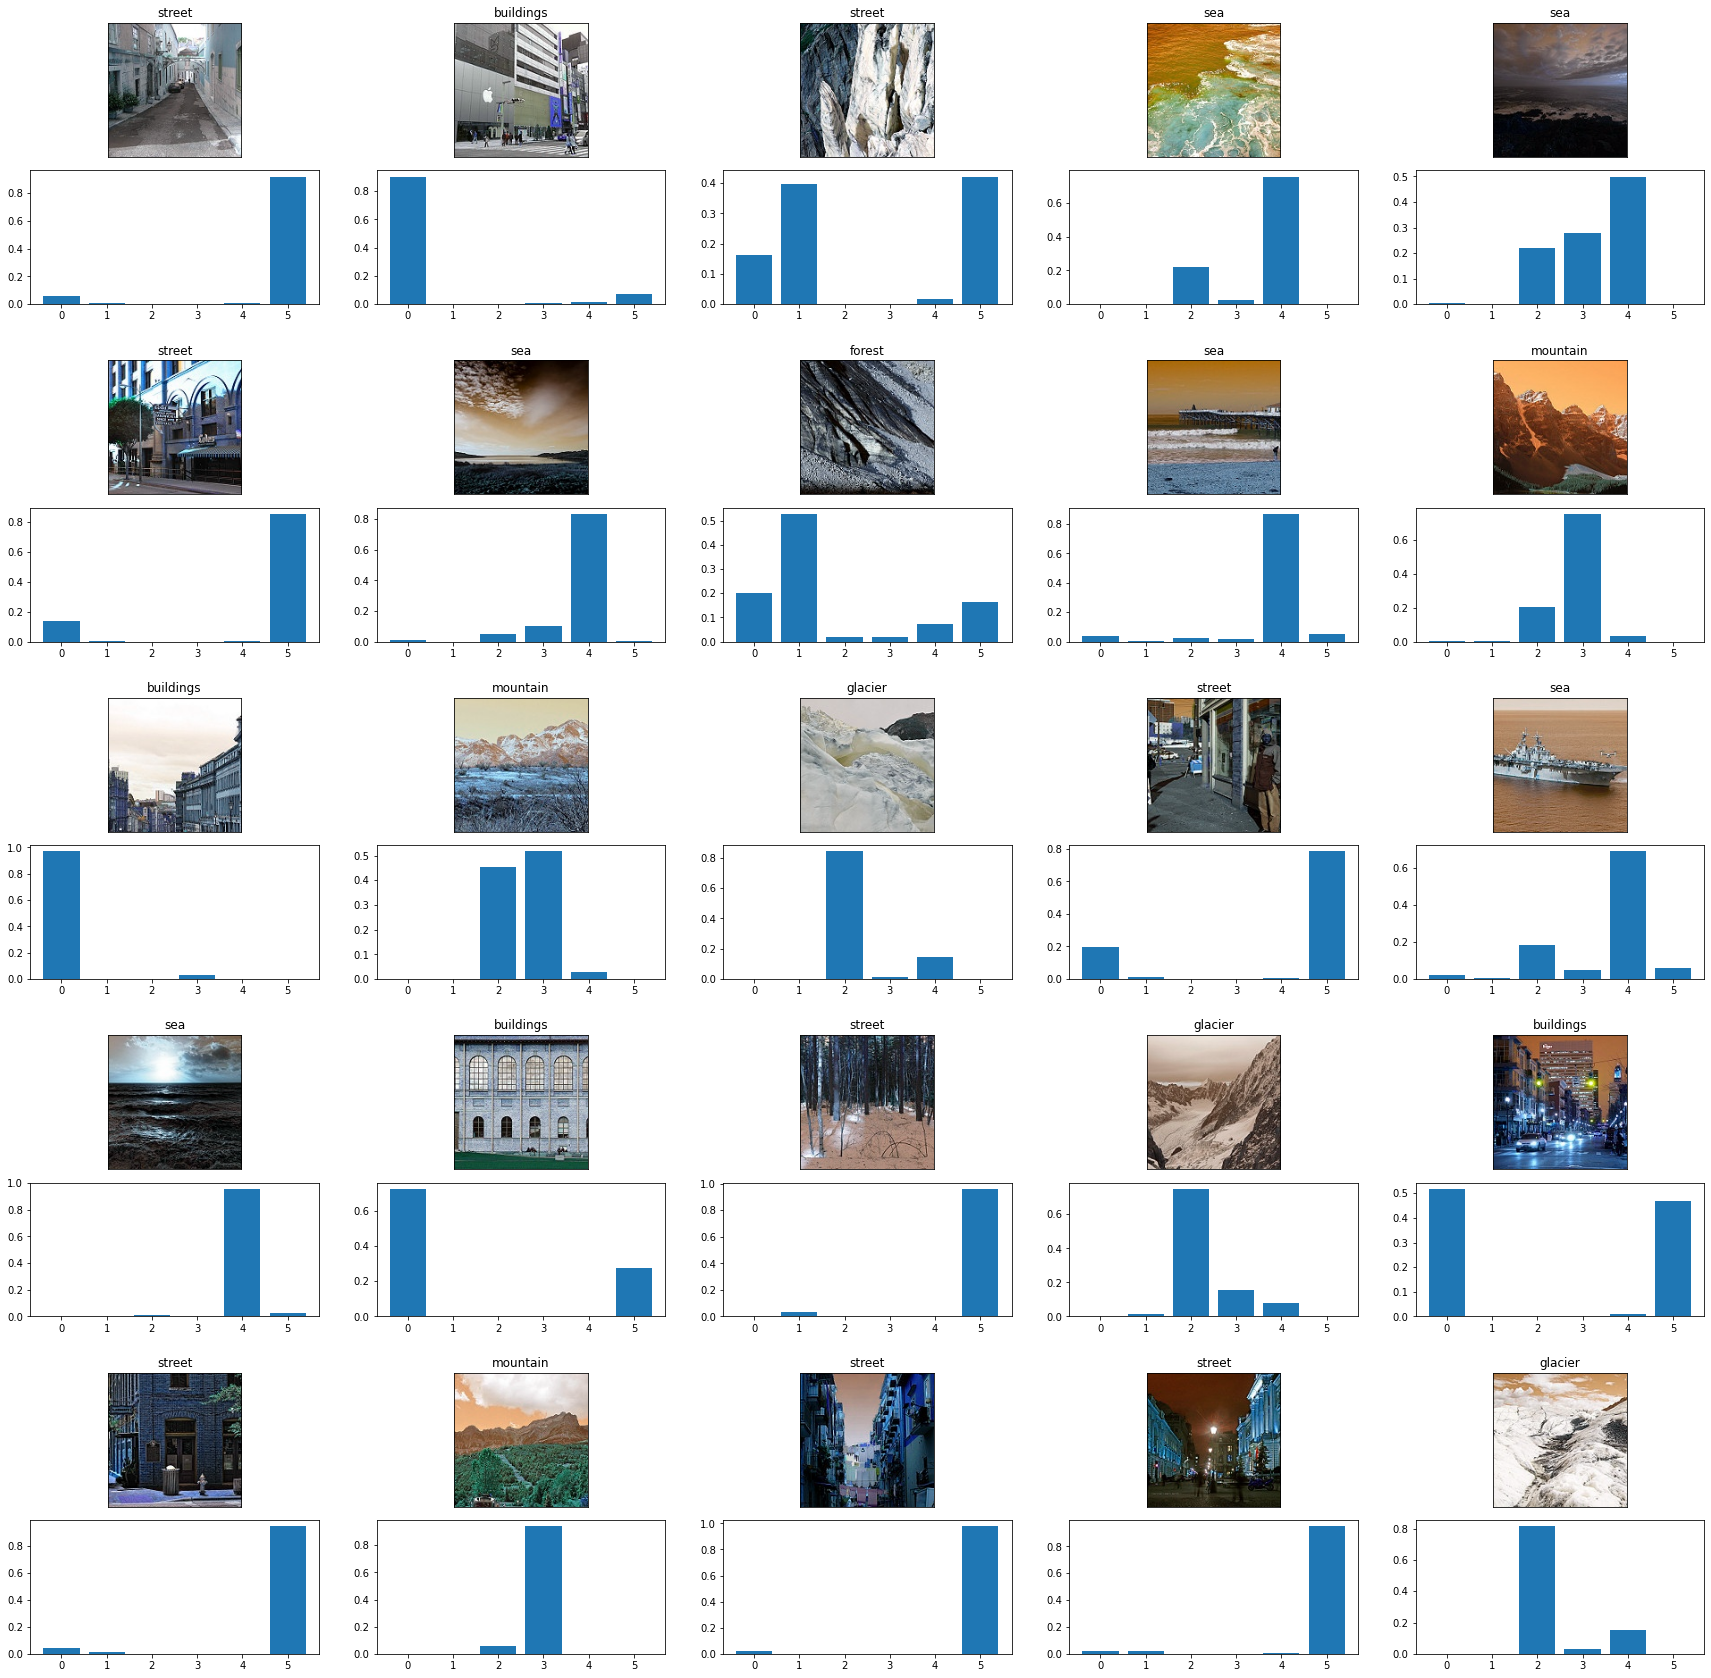

In [45]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model8.predict_classes(pred_image)[0])
    pred_prob = model8.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)

In [36]:
pred_prob = model8.predict_classes(pred_image)
pred_prob

array([1], dtype=int64)

In [31]:
dir(model8)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_trackable',
 '_add_unique_metric_name',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_attribute_sentinel',
 '_autocast',
 '_base_init',
 '_build_input_shape',
 '_build_model_with_inputs',
 '_cache_output_metric_attributes',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_check_call_args',
 '_check_trainable_weights_consistency',
 '_checkpoint_dependencies',
 '_clear_losse